# Retrieval Augmented Generation with Vision Language Models - The Future of RAG - A breakthrough technology

## Introduction

A very successful use of Large Language Models in the enterprise setting makes use of the Retrieval-Augmented Generation technique, or RAG. What is that, and what are the steps to have a successful RAG set-up?

In this article, we first describe what is RAG, and what techniques are available. Then we dive deep into a very novel approach to RAG, that makes use of Vision Language Models, or VLM. Vision Language Models are Multimodel models, which means they can "see" and "read". We will see that, surprisingly, VLMs help not only solving problems that are based on images, but they are also good at solving text-based problems. Sometimes even better than pure Language Models.

### Retrieval-Augmented Generation or RAG
When we ask a question to ChatGPT, we get an answer that comes from... somewhere. The information that ChatGPT returns is embedded in the model itself and came from some training over some data. There is no way to understand where this information comes from. Another challenge with this information is that if it is time relevant (like "What is the weather like today?"), it cannot give the right answer. The reason is that the models are trained over months (because training is time-intensive), on data that is curated over months (because the data quality has a big impact on the output, and needs to be collected over many websites). Therefore language models are condemned to be outdated. Of course, if you want to translate a text, you do not need up-to-date information. The same holds if you need information about a topic that is not recent. like for example Pythagoras theorem, since this is well established and does not change daily.

This is why RAG is very useful. It consists of providing the Language Model with relevant information, and then the Language Model can "analyze" the content and formulate an answer based on this content. There are several advantages to this approach. First, the answer is "grounded", meaning that there is evidence to justify and verify the answer. Second, the Language Model has access to the information only at this moment and the information is otherwise never exposed to the Model. This is especially relevant for enterprise systems, since data is very often confidential: it should not be shared with the outside world, and in some cases it should also not be shared within the firm. Imagine a cahtbot that tells you the salary of your colleagues, because the Language Model was trained on this data!

### Pre-processing: text extraction

Surprisingly, the most challenging part of the RAG is in the pre-processing of the documents: the text extraction from documents like pdf or Power Point files. Why is this so challenging? In modern documents, a lot of informaiton is contained in images (like charts) and tables. Especially in documents that are prepared for presentations, like Power Point slides, the layout is critical to understand the content. For example, there can be arrows that show a workflow. It is not possible with a text-only approach, to extract this information. What we also observe in documents is company logos instead of company names, which again cannot be interpreted by text-only approaches.

A lot of work has been done for many years to improve the pdf extraction. More recently, due to the high demand for RAG use cases and novel approaches using Generative AI, there has been significant improvements. But still, we feel that it is not yet totally there.

Let's mention the recent developments made by Unstructured.io, or LlamaParse. LlamaParse, that we consider to be the best at the time of writing (August 2024), makes use of Generative AI for the extraction. The text extraction techniques used are so heavy that they are done on the servers of these companies, not on the local machines. This again raises some data protection concerns for enterprise use cases.

On the Open Source side, we consider the library marker as one of the best available. It has a workflow of identifying tables and images, and extracting them properly. The library is available as open source, meaning anybody can use it. We have tested it and, while it is heavy and to use and is sometimes running for several minutes (by nature since it is based on modern Machine Learning techniques), it can run on your own local machine. But you almost need to be equipped with a GPU (which you typically have on modern Macbooks), otherwise it will take too much time to run. But since these techniques are based on Machine Learning, they obviously do not reach 100% accuracy, which can kill a use case. And by extracting images as well, this makes it unusable for a text-only RAG.

We see the use of Vision Language Models (VLM) as a possible solution to solve all these issues. A very novel technique, based on a model called ColPali, allows to extract the relevant documents from pdf files directly (converted for this purpose into images), without any need for pre-processing. This is the technique we present in this article.

### Retrieval: the "R" of RAG
To have a good RAG set-up, it is crucial to have a good retriever that will retrieve the most relevant passages to a specific question or a specific topic, called a "query". There are different techniques for this, the most widely used being based on "embeddings". All the text passages are encoded into an embedding (a vector, which is a set of numbers) that represent the semantic meaning of the passages.

To find the passages that best match the query, the query itself is also embedded using the same technique, which brings it to the same "semantic space" as the passages. Comparing the query embedding with all the other embeddings (from the passages), the "closest" passages embeddings to the query are selected and injected into the Language Model prompt (which we will describe below).

Other retrieval techniques are for example ColBERT, where not the entire passage is encoded into a vector, but each word is encoded into a vector. (To be exact, each token is encoded into a vector, where a token is close to being a word.). Then the words from the query and the words from the passages are somehow compared and from it, we get the best matching passages. As you can imagine, this technique requires more computation. But there are optimization techniques that have made this approach very fast as well. The results from this technique is significantly better than the vector embedding technique. It also has the advantage to be very transparent: you can see which words from the query and passages match best. I will cover this approach more in detail in another article soon.

Finally, we need to mention that for retrieval, the good old technique of word matching is still relevant. For this, we see more and more techniques that involve both approaches, the word matching technique and the embedding technique. These are called hybrid search.

What we also observe more and more: the use of a simple and fast retrieval technique to extract the relevant passages, let's say the top 100. Then use a more refined (but computationally more intensive) technique to extract, out of these 100 passages, the top 5 that are most relevant according to the refined technique. This second step of the search is called re-ranker. This seems to be a good compromise between speed and quality.

Other relevant factors are for example how old is the file, and who has access to the file. This goes of course beyond the embeddings and requires the use of metadata (like file timestamp) to pre-filter which passages are fine to be searched.

How is the quality of a retriever typically measured? There are several techniques to measure it, let's focus on one of the most widely used: the Normalized Discounter Cumulative Gain, or NDCG. Using a set of test data from which we know the order of relevancy, we can evaluate the NGDC@5, for example, which measures the relevancy of the retriever's results for the top 5 passages.

### Generation: the "G" of RAG
Once the passages are available, the Language Model needs to make use of this information to analyze it and formulate an answer. This is done with a Language Model, for which a prompt is built injecting the passages with some instructions like "Based on the context below, answer the question. If you do not find the answer in the context, tell that you do not know. Do not invent answers." As you can see the instruction needs to specify that the Language Model should not invent an answer. This instruction is to reduce the risk of "hallucinations", i.e. having the Language Model inventing an answer (which is not rare).

What does the Language Model do? Many things! It has to "analyze" the passages, then summarize them. This is why a good Language Model (like GPT-4 or Claude Sonnet 3.5) is typically recommended.

## Limitations of text-RAG
To understand the limitations of text-RAG, let's look at a few examples where the pdf extraction does not work well. For this, let's look at examples provided in the article published on ColPali<sup>1</sup>. These are part of a dataset called ViDoRe, which has been built for the purpose of developping the model ColPali, which we will use later in this article.

<center>
    <img src="images/vidore_examples_1.png" width="500" alt="Description">
    <img src="images/vidore_examples_2.png" width="500" alt="Description">
</center>

These examples illustrate the challenges that text-only RAG would have: how to extract numbers from a chart? How to extract numbers from a complex table? Some text-only approaches are good at this but never totally reliable.

And the complexity goes increasing: how to extract text from a flow chart? And from a picture? This is, as far as we know, not possible with a text-only approach.

This brings us to the use of Vision Language Models for both the retrieval and the generation.

## Vision-RAG: Vision Retrieval-Augmented Generation
A way to solve these limitations is to use Vision-Language Models, VLM:
- The retrieval is done using a retriever that makes use of the images rather than the text: the model ColPali
- The generation is done using a VLM like GPT-4o or Claude Sonnet 3.5, by feeding images of the pdf documents (provided to the model as "screenshots"), page-by-page

To our best knowledge, this approach has been invented by Faysse et al<sup>1</sup> and seems to be a breakthrough in the domain of document understanding.

This approach is still very new (the article from Fayss et al. was published in July 2024) and therefore it is still a bit demanding to use it, since it has not yet been developed to a totally user-friendly library, but is a research project.

For the remainder of this article, we are going through this approach end-to-end. Instead of using the available library, we are going to extract only the relevant parts of the library, in order to be as transparent as possible in the approach.

The technical details might be hard to digest. If you are not a specialist, you can also skip the programming code and only read the text. It should be self-sustainable.

All credits for the developments go to the authors of the ColPali model and article<sup>1</sup>. For those who want to go directly to the model, check out the Hugging Face page<sup>2</sup>.

We have also taken a lot of inspiration from Jo Bergum's blog on vespa.ai<sup>3</sup>.

### Retrieval

Let's focus on the retrieval first. The retrieval consists of having a model that takes as input a query (a question or a topic) and returns the most relevant pages of a document, i.e. the pages that will most likely help answering the question or the topic. In order to achieve this, we need a model that takes a query and a set of documents, and returns the top 5 (or top k) pages.

First we will "get" the model. This means, we will copy the ColPali model programmatically, and then download the corresponding weights from Hugging Face, a platform where models are stored.

This problem is split into two parts: first we "index" the documents, meaning that we put them in a format that will allow to query on them. Why do we do this first? We do this first because we might ask more than just one question to the documents. Therefore we prepare the system by indexing documents. Once indexed, the retriever will be able to ask as many times as we need questions and retrieve the best matching passages.

After the indexing, we will build a function that will query the index.

Let's first get the relevant libraries. Download them using pip if you do not have them yet.

In [1]:
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
from transformers import AutoProcessor
from PIL import Image
from io import BytesIO

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Let's now define the device that will be used. This will allow to switch to the GPU (the powerful processors suited for AI calculations) when needed.

In [2]:
if torch.cuda.is_available():
  device = torch.device("cuda")
  type = torch.bfloat16
elif torch.backends.mps.is_available():
  device = torch.device("mps")
  type = torch.bfloat16
else:
  device = torch.device("cpu")
  type = torch.float32

#### Downloading the model
Let's use the following code to get the model.

The first part defines the model. The second part loads the model.

<b>WARNING:</b> loading the model requires downloading around 10GB of data and takes time, but this is done only the first time.

In [3]:
from torch import nn
from transformers.models.paligemma.modeling_paligemma import PaliGemmaForConditionalGeneration, PaliGemmaPreTrainedModel

class ColPali(PaliGemmaPreTrainedModel):
    def __init__(self, config):
        super(ColPali, self).__init__(config=config)
        self.model: PaliGemmaForConditionalGeneration = PaliGemmaForConditionalGeneration(config)
        self.dim = 128
        self.custom_text_proj = nn.Linear(self.model.config.text_config.hidden_size, self.dim)
        self.main_input_name = "doc_input_ids"

    def forward(self, *args, **kwargs):
        """
        Forward pass through Llama and the linear layer for dimensionality reduction

        Args:
        - input_ids (torch.LongTensor): The input tokens tensor.
        - attention_mask (torch.LongTensor): The attention mask tensor.

        Returns:
        - torch.Tensor: Embeddings of shape (batch_size, num_tokens, dim)
        """
        outputs = self.model(*args, output_hidden_states=True, **kwargs)
        last_hidden_states = outputs.hidden_states[-1]
        proj = self.custom_text_proj(last_hidden_states)
        # normalize l2 norm
        proj = proj / proj.norm(dim=-1, keepdim=True)
        proj = proj * kwargs["attention_mask"].unsqueeze(-1)
        return proj

In [4]:
model_name = "vidore/colpali"
model = ColPali.from_pretrained("google/paligemma-3b-mix-448", torch_dtype=type, device_map=device).eval()
model.load_adapter(model_name)
model.to(device)
processor = AutoProcessor.from_pretrained(model_name)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/transformers/models/paligemma/configuration_paligemma.py:137: FutureWarning: The `vocab_size` attribute is deprecated and will be removed in v4.44, Please use `text_config.vocab_size` instead.
  warnings.warn(
`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.
Loading checkpoint shards: 100%|██████████████████| 3/3 [00:12<00:00,  4.32s/it]
Some weights of ColPali were not initialized from the model checkpoint at google/paligemma-3b-mix-448 and are newly initialized: ['custom_text_proj.bias', 'custom_text_proj.weight', 'language_model.lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Now we have the model! We can start the indexing of the documents.

#### Indexing the documents

Let's index the documents. We want to do a bit more than just indexing the documents. We want to also extract metadata (like for example the page number and the file name) that might be helpful in downstream tasks.

If you want to reproduce the same example as below, you need to download two articles from Arxiv and put them in your local subfolder 'data':
- BERT_Article.pdf: https://arxiv.org/pdf/1810.04805
- Transformers_Article.pdf: https://arxiv.org/pdf/1706.03762

In [5]:
pdfs = [{"file_name": "data/BERT_Article.pdf"}, {"file_name": "data/Transformers_Article.pdf"}]

In [11]:
import requests
from pdf2image import convert_from_path
from pypdf import PdfReader

def preprocessing(pdfs):
    documents = []
    images = []
    metadata = []
    for pdf in pdfs:
        file_name = pdf["file_name"]
        reader = PdfReader(file_name)
        for page_number in range(len(reader.pages)):
            page = reader.pages[page_number]
            text = page.extract_text()
            documents.append(text)
            metadata.append({"page": page_number, "file_path": file_name})
        images_for_file = convert_from_path(file_name)
        images += images_for_file
    assert len(images) == len(documents)
    assert len(metadata) == len(documents)
    return documents, images, metadata

documents, images, metadata = preprocessing(pdfs)

In [12]:
from pdf2image import convert_from_path
from PIL import Image
from torch.utils.data import DataLoader
from tqdm import tqdm
from transformers import AutoProcessor

def indexing(images):
    ds = []
    dataloader = DataLoader(
        images,
        batch_size=1,
        shuffle=False,
        collate_fn=lambda x: process_images(processor, x),
    )
    for batch_doc in tqdm(dataloader):
        with torch.no_grad():
            batch_doc = {k: v.to(device) for k, v in batch_doc.items()}
            embeddings_doc = model(**batch_doc)
        ds.extend(list(torch.unbind(embeddings_doc.to("cpu"))))
    return ds

# Help function to process the images into the right (data) format
def process_images(processor, images, max_length: int = 50):
    texts_doc = ["Describe the image."] * len(images)
    images = [image.convert("RGB") for image in images]

    batch_doc = processor(
        text=texts_doc,
        images=images,
        return_tensors="pt",
        padding="longest",
        max_length=max_length + processor.image_seq_length,
    )
    return batch_doc

Running the index might take some time. With my configuration (Mac M3 Pro 18GB), it takes around one minute. Be careful that it runs on your GPU (if you have one), otherwise it can easily take 10 times more time.

In [13]:
index = indexing(images)

100%|███████████████████████████████████████████| 31/31 [01:03<00:00,  2.05s/it]


We have successfully built our index!
The data we have is as follows:
- documents: A list containing the text of each page of the files under consideration
- images: A list containing the image of each page of the files under consideration
- metadata: The metadata for each page of the files under consideration
- index: A list containing the "encoding" of each page. The encoding is a torch tensor of size 1030x128 (check with index[0].shape)

Now that we have our index, let's build a retriever. What it will do: it will take as input a query (a text), the index, and the number k of pages we want. It will return as output the list of k pages ordered by score, decreasing.

#### Building the retriever

Let's define a function that will "search" among the pages of the files. We will for this convert the query into a tensor, and compare this tensor to the tensors corresponding to the pages of the documents. We will keep the top 5 (or top k) documents that show the best match to the query.

In [14]:
# The model requires a mock image to be added to the query.
mock_image = Image.new("RGB", (448, 448), (255, 255, 255))

def search(query: str, index, documents, images, metadata, k=5):
    # text, images, and metadata are just passed without processing
    qs = []
    with torch.no_grad():
        batch_query = process_queries(processor, [query], mock_image)
        batch_query = {k: v.to(device) for k, v in batch_query.items()}
        embeddings_query = model(**batch_query)
        qs.extend(list(torch.unbind(embeddings_query.to("cpu"))))
    # run evaluation
    scores = evaluate_colbert(qs, index)
    relevant_pages = torch.topk(scores, k, dim=1, largest=True).indices
    relevant_pages = relevant_pages.squeeze()
    result = []
    for p in relevant_pages:
        result.append({"document": documents[p], "image": images[p], "score": scores[:,p].item(), "metadata": metadata[p]})
    return result

# Help function to process the queries into the right (data) format
def process_queries(processor, queries, mock_image, max_length: int = 50):
    texts_query = []
    for query in queries:
        query = f"Question: {query}<unused0><unused0><unused0><unused0><unused0>"
        texts_query.append(query)

    batch_query = processor(
        images=[mock_image.convert("RGB")] * len(texts_query),
        # NOTE: the image is not used in batch_query but it is required for calling the processor
        text=texts_query,
        return_tensors="pt",
        padding="longest",
        max_length=max_length + processor.image_seq_length,
    )
    del batch_query["pixel_values"]

    batch_query["input_ids"] = batch_query["input_ids"][..., processor.image_seq_length :]
    batch_query["attention_mask"] = batch_query["attention_mask"][..., processor.image_seq_length :]
    return batch_query

# Help function to calculate the scores between queries and documents
def evaluate_colbert(qs, ps, batch_size=128) -> torch.Tensor:
    scores = []
    for i in range(0, len(qs), batch_size):
        scores_batch = []
        qs_batch = torch.nn.utils.rnn.pad_sequence(qs[i : i + batch_size], batch_first=True, padding_value=0).to(device)
        for j in range(0, len(ps), batch_size):
            ps_batch = torch.nn.utils.rnn.pad_sequence(
                ps[j : j + batch_size], batch_first=True, padding_value=0
            ).to(device)
            scores_batch.append(torch.einsum("bnd,csd->bcns", qs_batch, ps_batch).max(dim=3)[0].sum(dim=2))
        scores_batch = torch.cat(scores_batch, dim=1).cpu()
        scores.append(scores_batch)
    scores = torch.cat(scores, dim=0)
    return scores

# Function for image processing
def scale_image(image: Image.Image, new_height: int = 1024) -> Image.Image:
    """
    Scale an image to a new height while maintaining the aspect ratio.
    """
    # Calculate the scaling factor
    width, height = image.size
    aspect_ratio = width / height
    new_width = int(new_height * aspect_ratio)

    # Resize the image
    scaled_image = image.resize((new_width, new_height))

    return scaled_image

In [27]:
query = "How many transformers blocks in BERT Base? Justify your answer."
retrieved_documents = search(query=query, index=index, documents=documents, images=images, metadata=metadata, k=3)


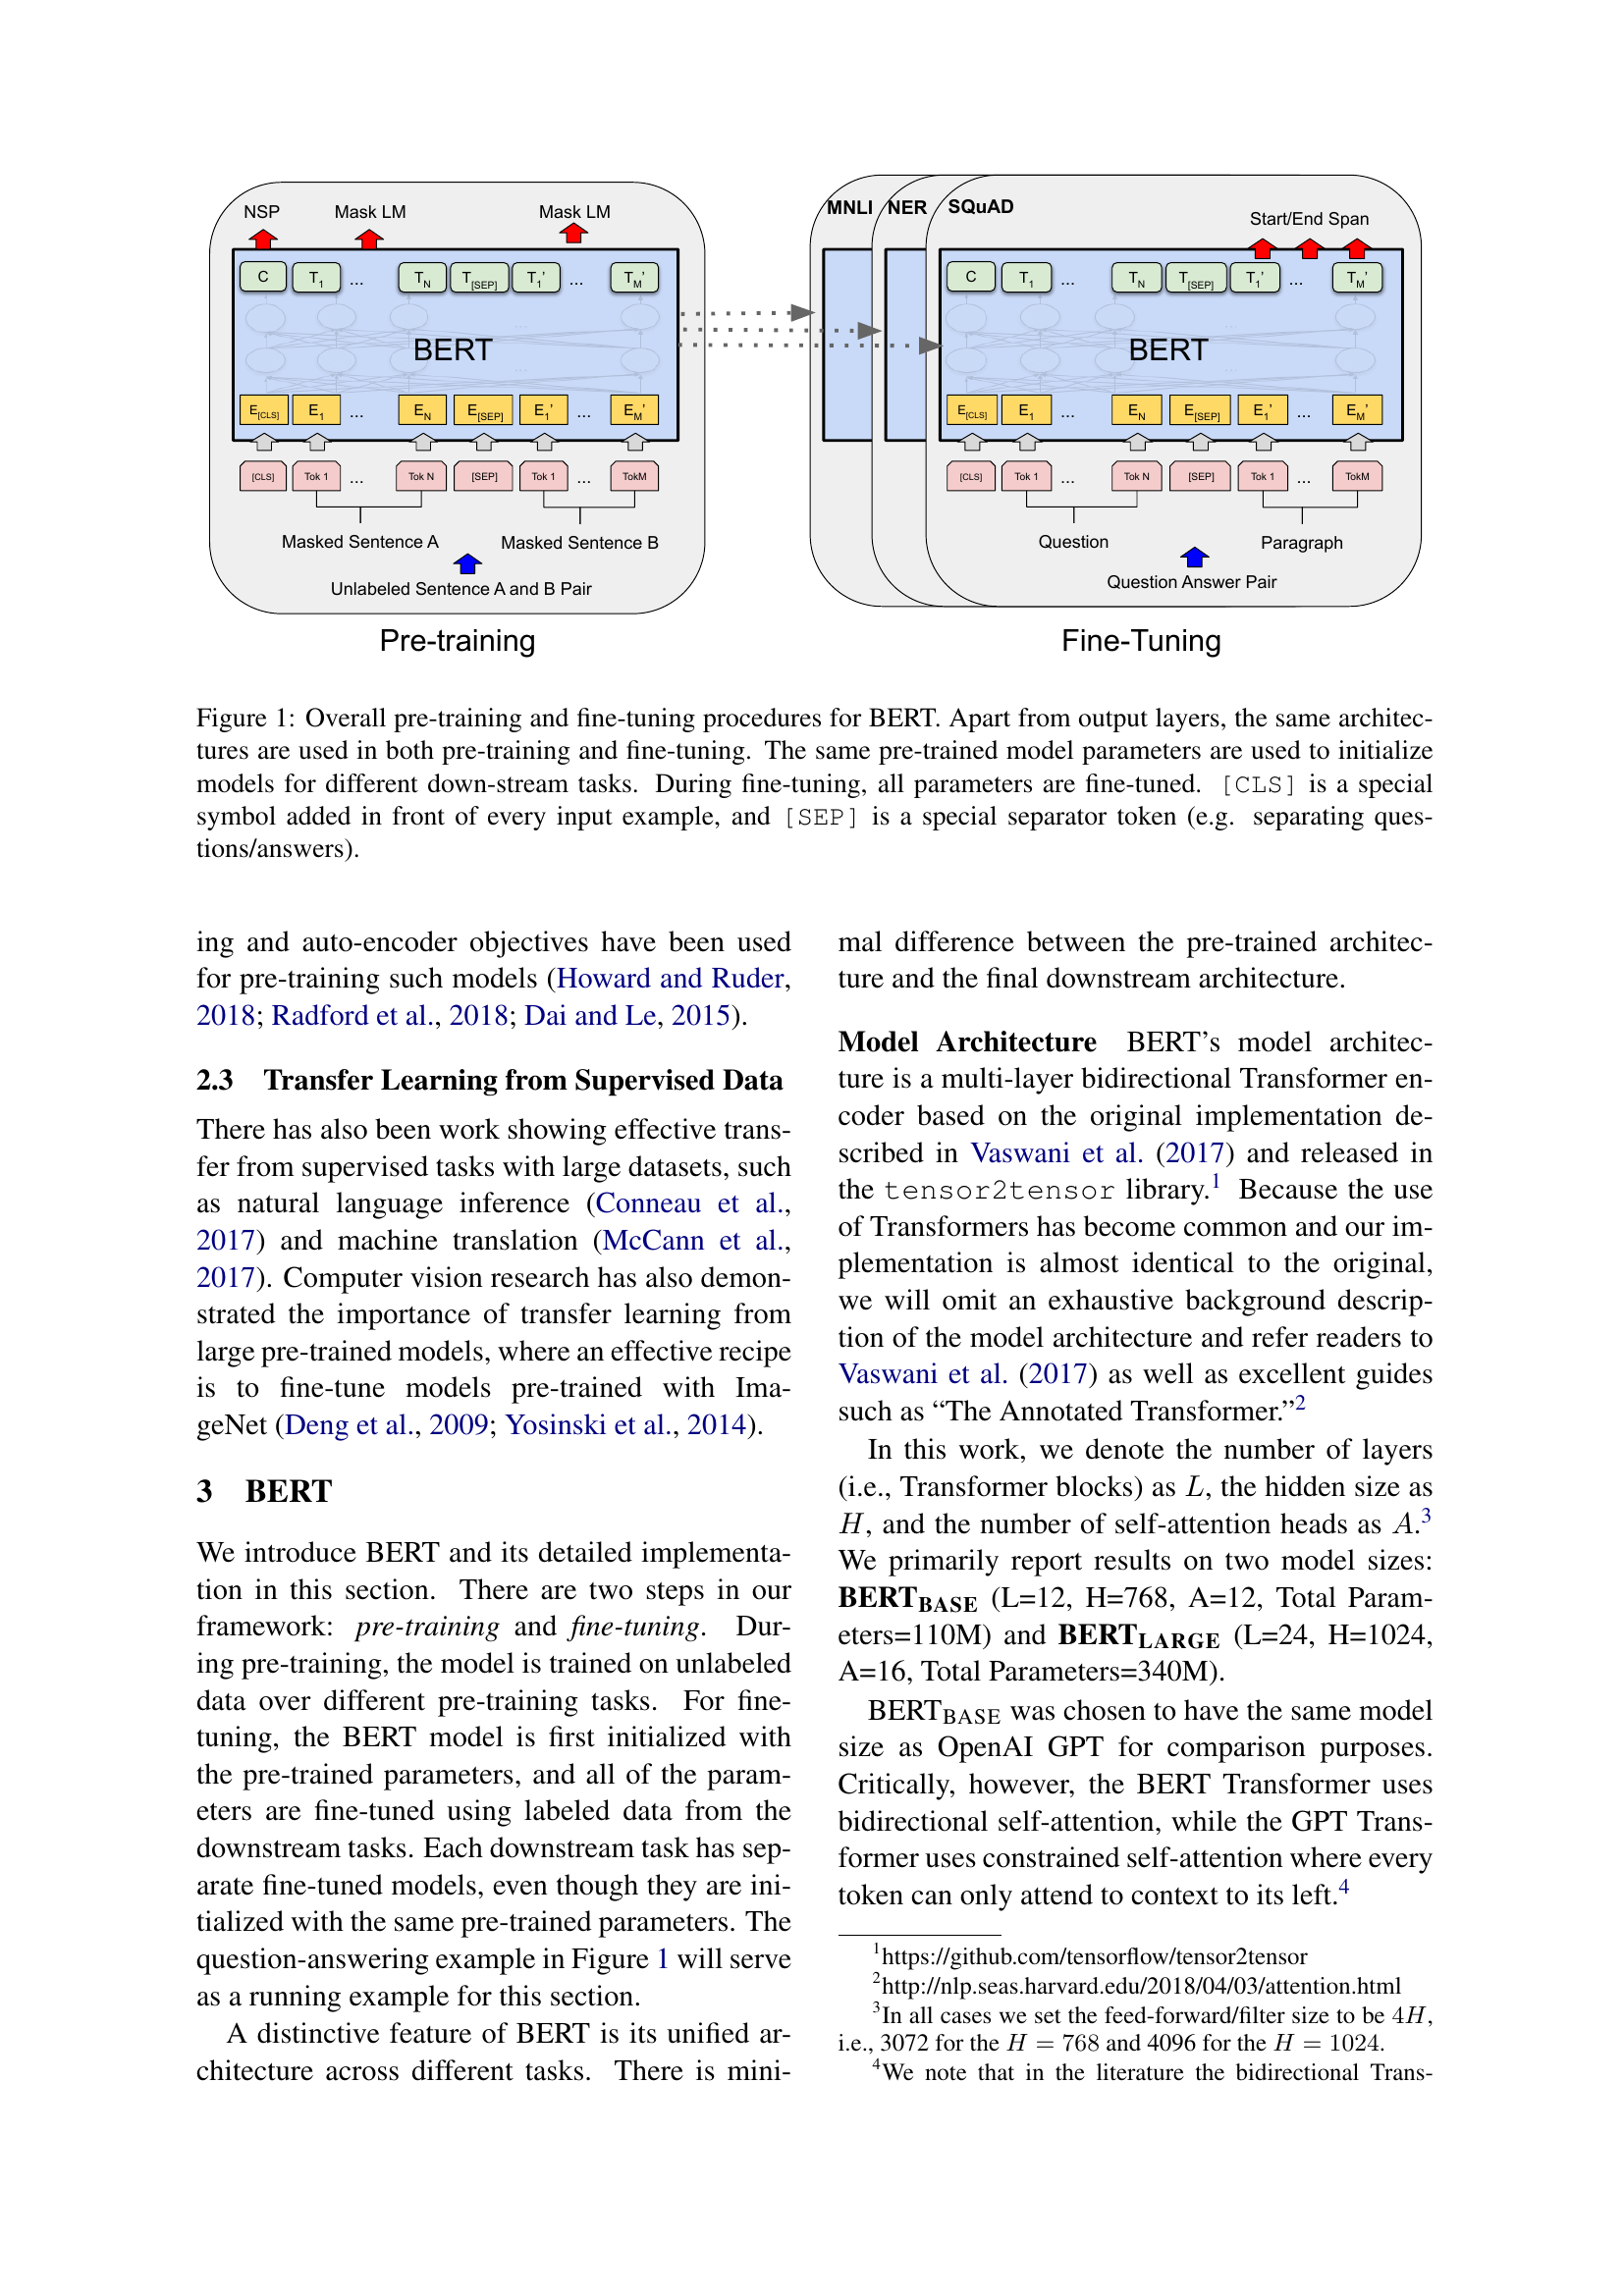
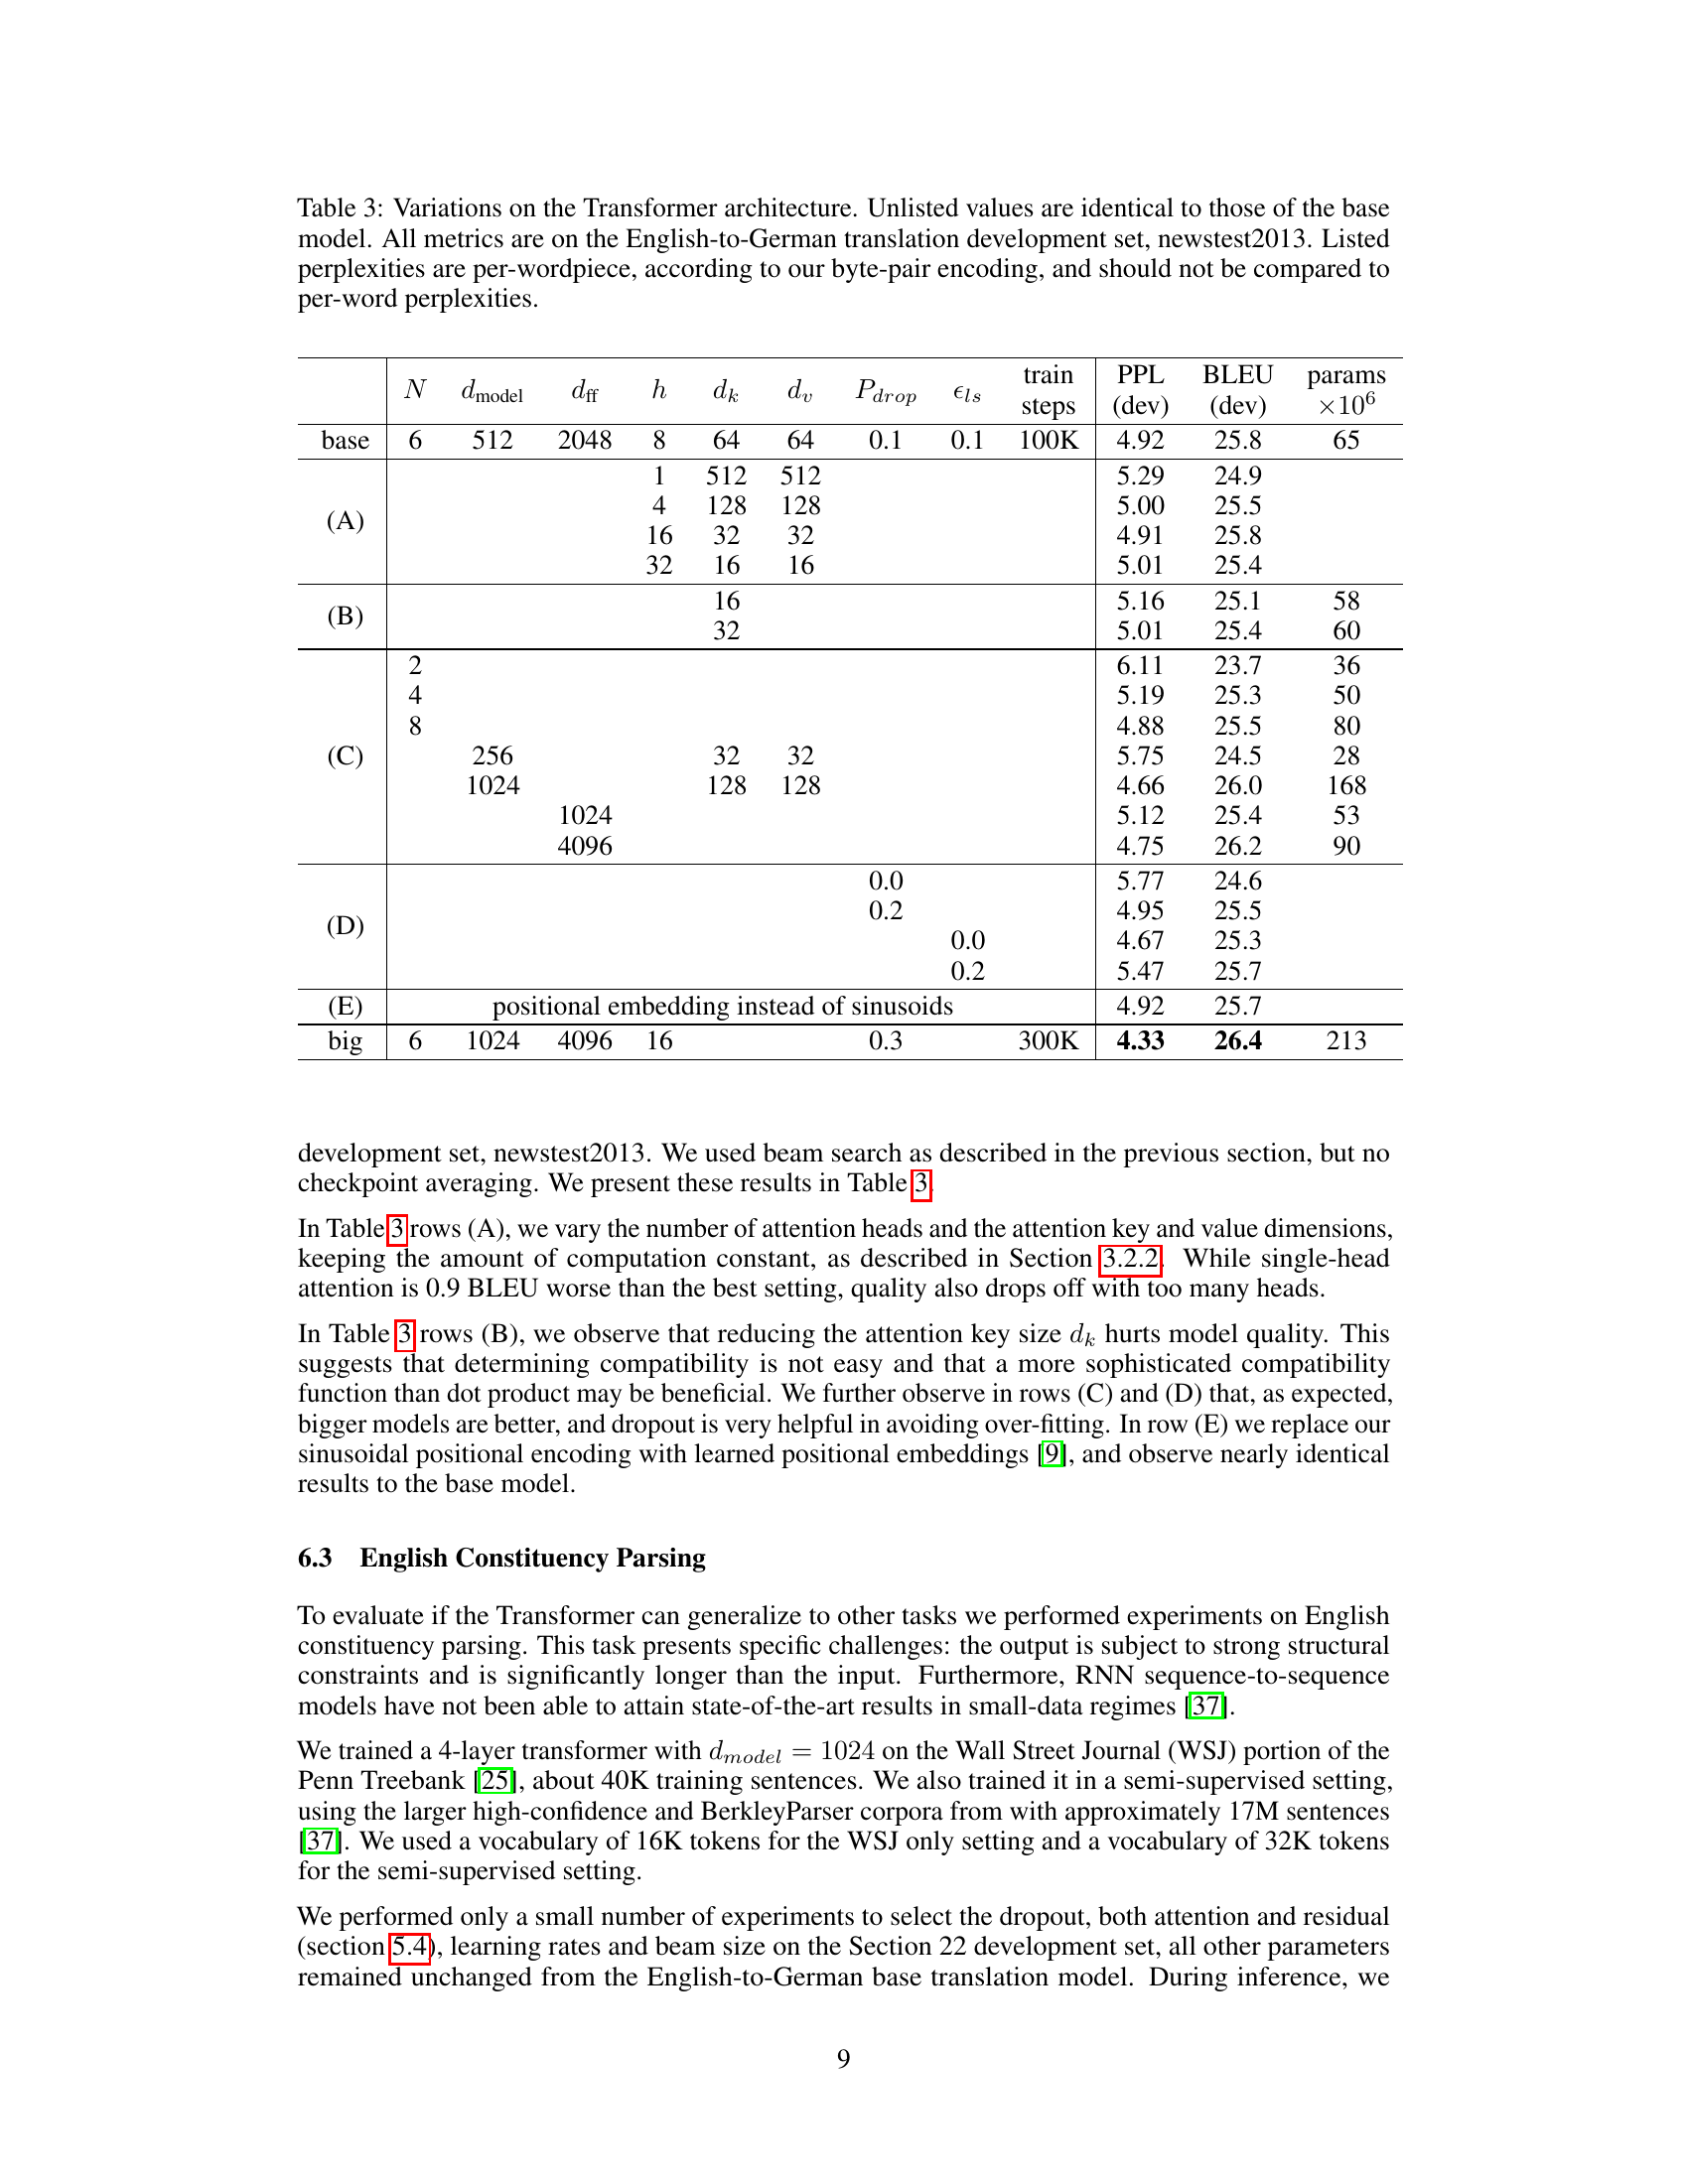
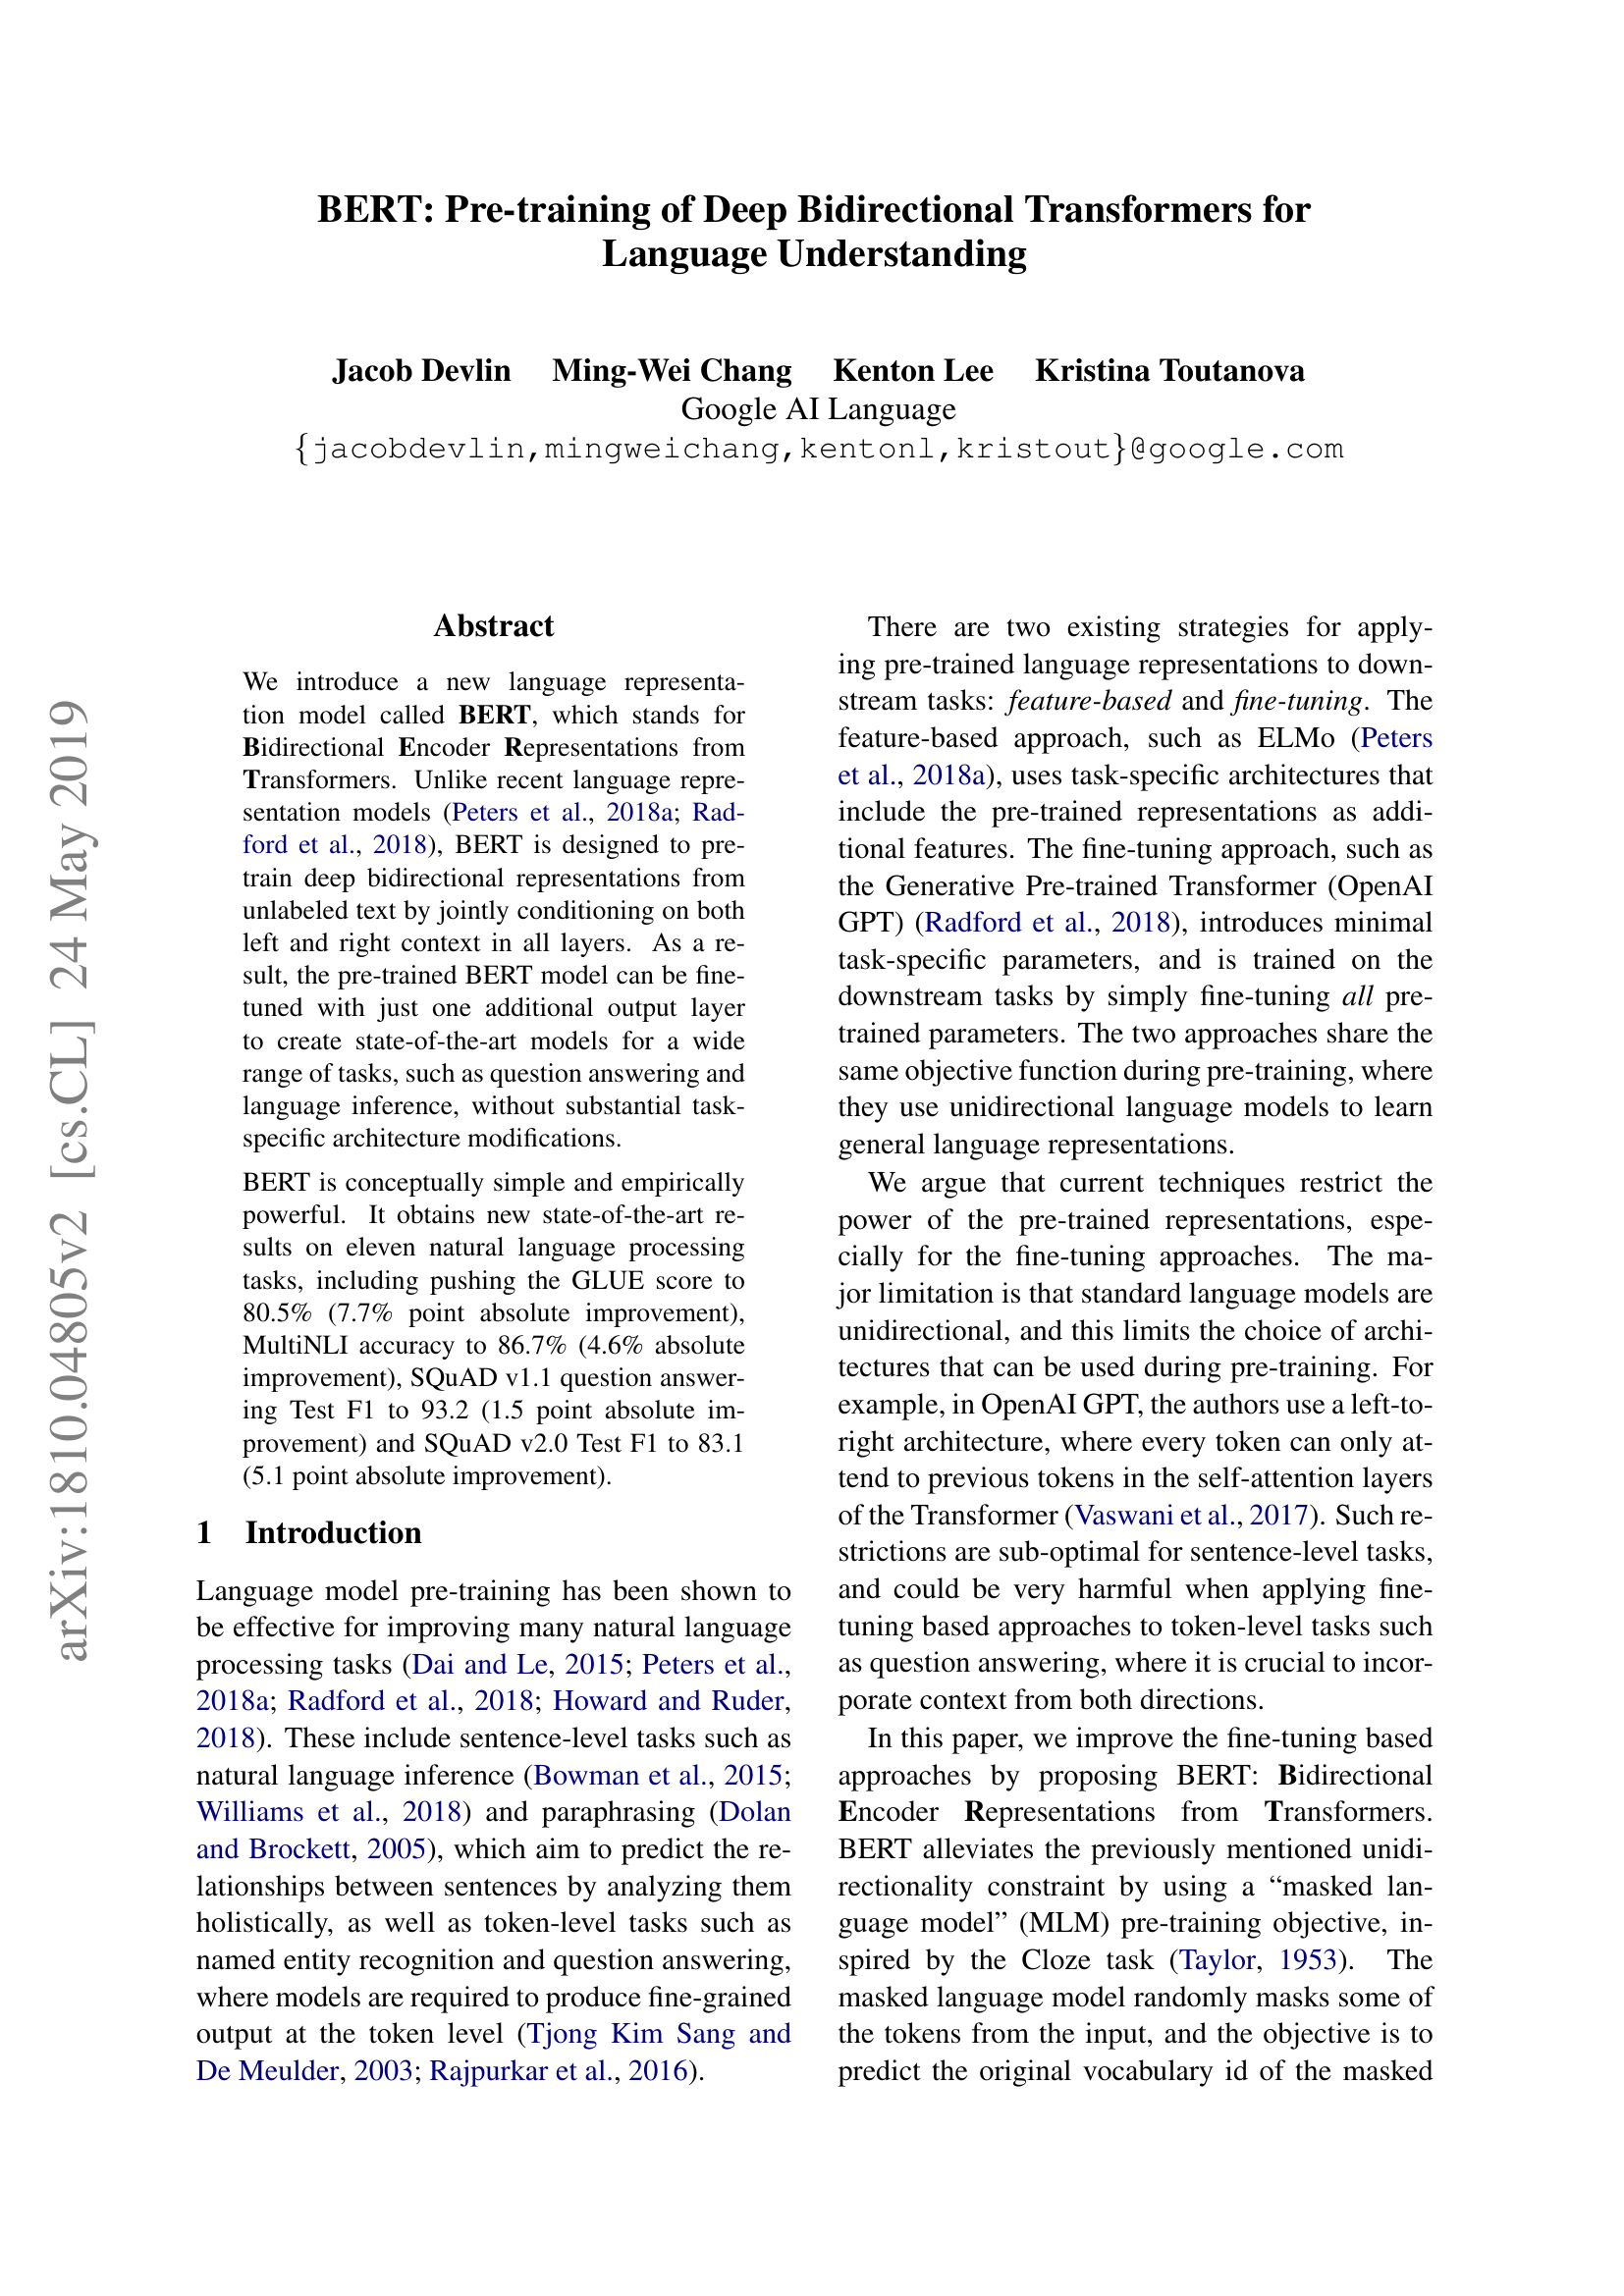

In [28]:
from IPython.display import display, HTML
import io
import base64

def display_images(retrieved_documents):
    html = "<table><tr>"
    
    for r in retrieved_documents:
        img = r["image"]  # Assuming this is a PIL Image object
        title1 = f"File: {r['metadata']['file_path']}"  # Extracting the title from metadata
        title2 = f"Page: {r['metadata']['page']}"  # Extracting the title from metadata
        title3 = f"Score: {r['score']}"  # Extracting the title from metadata
        
        # Save the image to a BytesIO object
        img_byte_arr = io.BytesIO()
        img.save(img_byte_arr, format='PNG')  # Save as PNG or any other format
        img_byte_arr.seek(0)  # Move to the beginning of the BytesIO object
        img_data = img_byte_arr.getvalue()
        img_base64 = base64.b64encode(img_data).decode('utf-8')  # Encode to base64
        
        # Create HTML for image with titles above
        html += f"""
        <td style='text-align: left;'>
            <div style='margin-bottom: 5px; font-size: 12px; color: black;'>
                {title1}<br>{title2}<br>{title3}
            </div>
            <img src='data:image/png;base64,{img_base64}' style='width: 200px;'>
        </td>
        """
    
    html += "</tr></table>"
    display(HTML(html))

# Example usage
display_images(retrieved_documents)

We are done! Let's summarize what we have done: we have pre-processed the data into lists including texts, images, metadata. Then we have indexed all the images. Further we have built a search function that, given a query and a "top k" as input (and the index, the images, the metadata), returns the top k images, i.e. the k images that match best the query (according to the model).

We have our retriever. Now we need to build the generator. This will be done using GPT-4o-mini, which is a multimodal model. What we will do: we will provide a query to the VLM, together with the top k images. Then the VLM will return an answer. This will be the end of the workflow.

Note that many refinements are possible (and recommended). Especially, instead of using the same query to retrieve documents and to generate the answer is not always appropriate. We might have an intermediate step that re-formulate a query specific to the retrieval step. This has been done by Khattab et al. in the DSPy framework (see dspy.ai).

### Generating the answer

We have already converted the image format to a base 64 format. At this stage we will need it to feed the VLM. The format of the prompt (which combines text and images) is such as below. We prepare it in advance.

We start with a help function to convert the image into the right format for OpenAI.

Note that this format works for OpenAI. For Anthropic it will be slightly different. Consult the documentation of Anthropic if you need it.

In [17]:
import base64
import io

# Function to process images
def get_base64_image(img: str | Image.Image, add_url_prefix: bool = True) -> str:
    """
    Convert an image (from a filepath or a PIL.Image object) to a JPEG-base64 string.
    """
    if isinstance(img, str):
        img = Image.open(img)
    elif isinstance(img, Image.Image):
        pass
    else:
        raise ValueError("`img` must be a path to an image or a PIL Image object.")

    buffered = io.BytesIO()
    img.save(buffered, format="jpeg")
    b64_data = base64.b64encode(buffered.getvalue()).decode("utf-8")

    return f"data:image/jpeg;base64,{b64_data}" if add_url_prefix else b64_data

In [29]:
# Format the images in the right format for the prompt
def convert_documents_to_prompt(retrieved_documents):
    images_for_vlm = []
    for r in retrieved_documents:
        images_for_vlm.append(
        {
            "type": "image_url",
            "image_url": {"url": get_base64_image(r["image"])}
        })
    return images_for_vlm

images_for_vlm = convert_documents_to_prompt(retrieved_documents)

In [30]:
from openai import OpenAI

# Visual Language Model
def vlm(prompt, retrieved_documents):
    
    images_for_vlm = convert_documents_to_prompt(retrieved_documents)
    content = [{"type": "text", "text": prompt}] + images_for_vlm
    
    client = OpenAI()
    response = client.chat.completions.create(
      model="gpt-4o-mini",
      messages=[
            {
                "role": "user",
                "content": content
            }
        ],
      max_tokens=300,
    )
    return response.choices[0].message.content

In [31]:
from IPython.display import display, Markdown
result = vlm(prompt=query, retrieved_documents=retrieved_documents)
display(Markdown(result))

BERT Base has **12 transformer blocks** (also referred to as layers). This is mentioned in the excerpts where it discusses the two model sizes, specifying that BERT Base (denoted as BERT_BASE) is characterized by \(L=12\), where \(L\) stands for the number of layers or transformer blocks.

Each transformer block in BERT is responsible for processing the input data through multiple self-attention heads and feed-forward networks, allowing the model to learn complex representations of the text. The architecture of BERT is designed to effectively capture context from both directions (bi-directionality), which is crucial for understanding nuanced language tasks.

### End-To-End workflow
Now let's put it all together and build an end-to-end pipeline. If you re-use the same files as previously, avoid running the indexing again as it takes time.

In [34]:
# RUN ONLY IF YOU HAVE SOMETHING NEW TO INDEX - THIS TAKES TIME
# Define the source files
pdfs = [{"file_name": "data/BERT_Article.pdf"}, {"file_name": "data/Transformers_Article.pdf"}]
# Preprocess the data
texts, images, metadata = preprocessing(pdfs)
# Index the data
index = indexing(images)

Retrieving documents...
Documents retrieved...
Generating the answer...
Answer generated...
----------------------------------------------------------------------------------------------------


**Images**


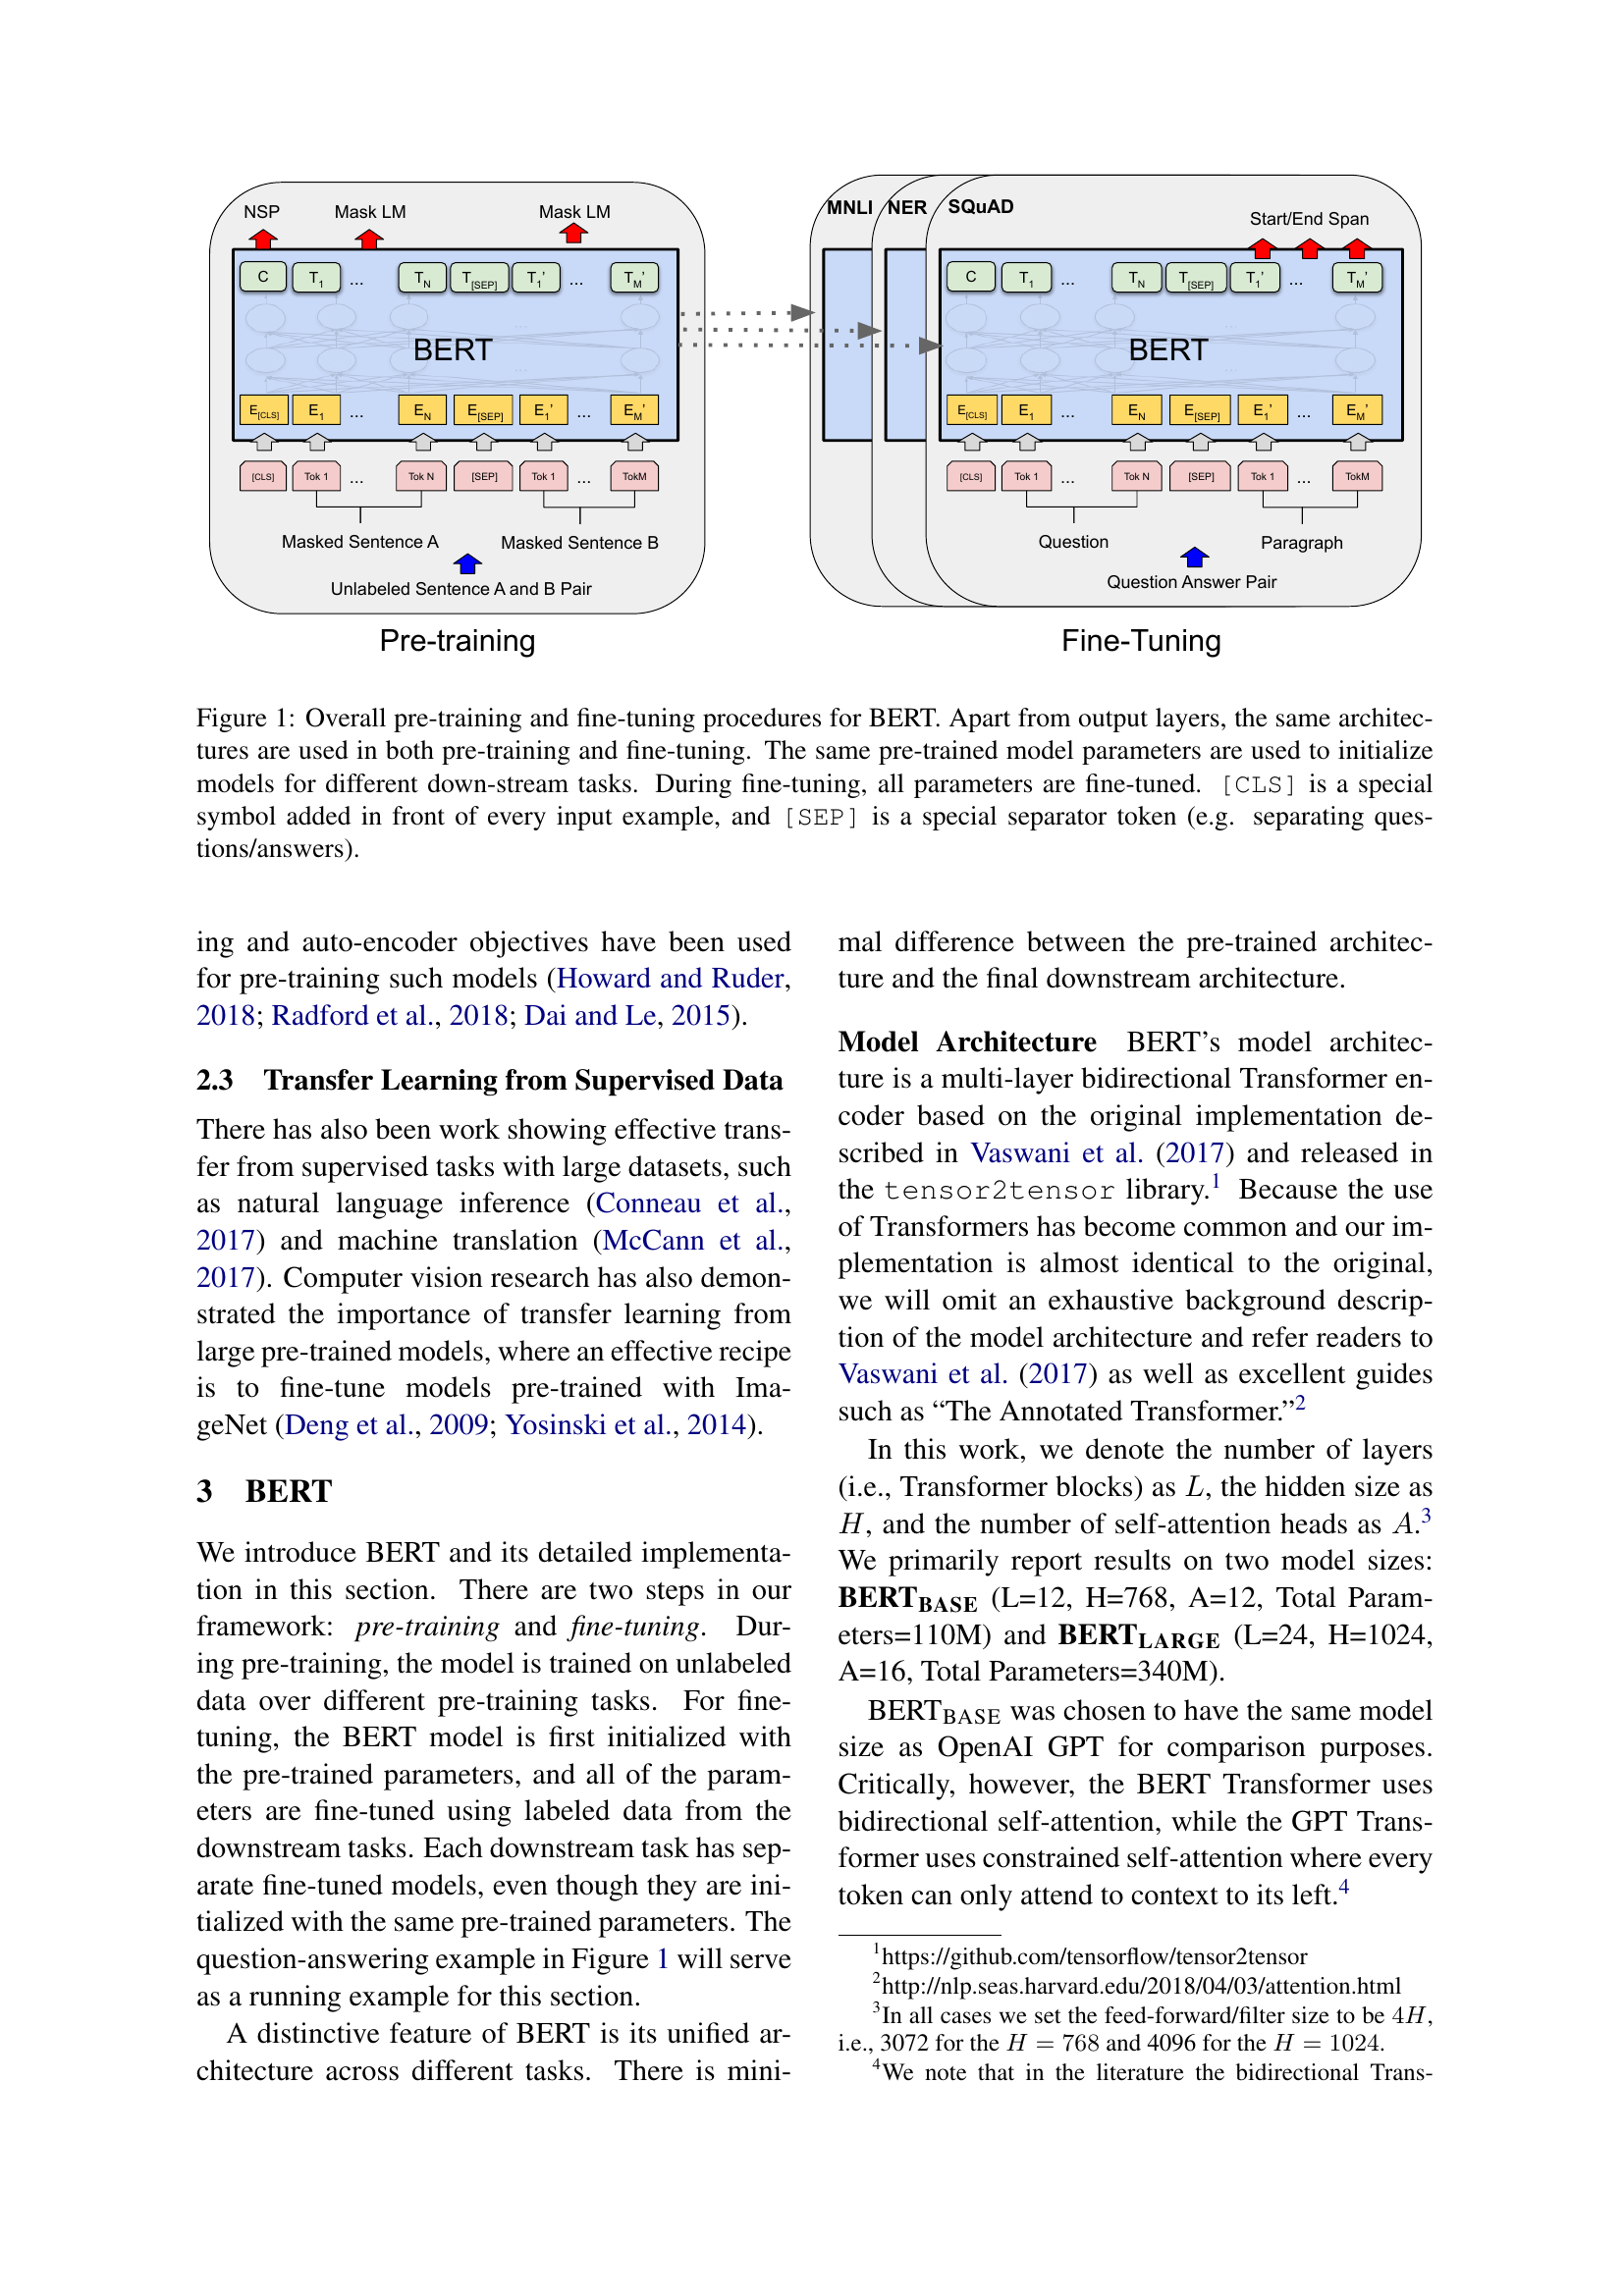
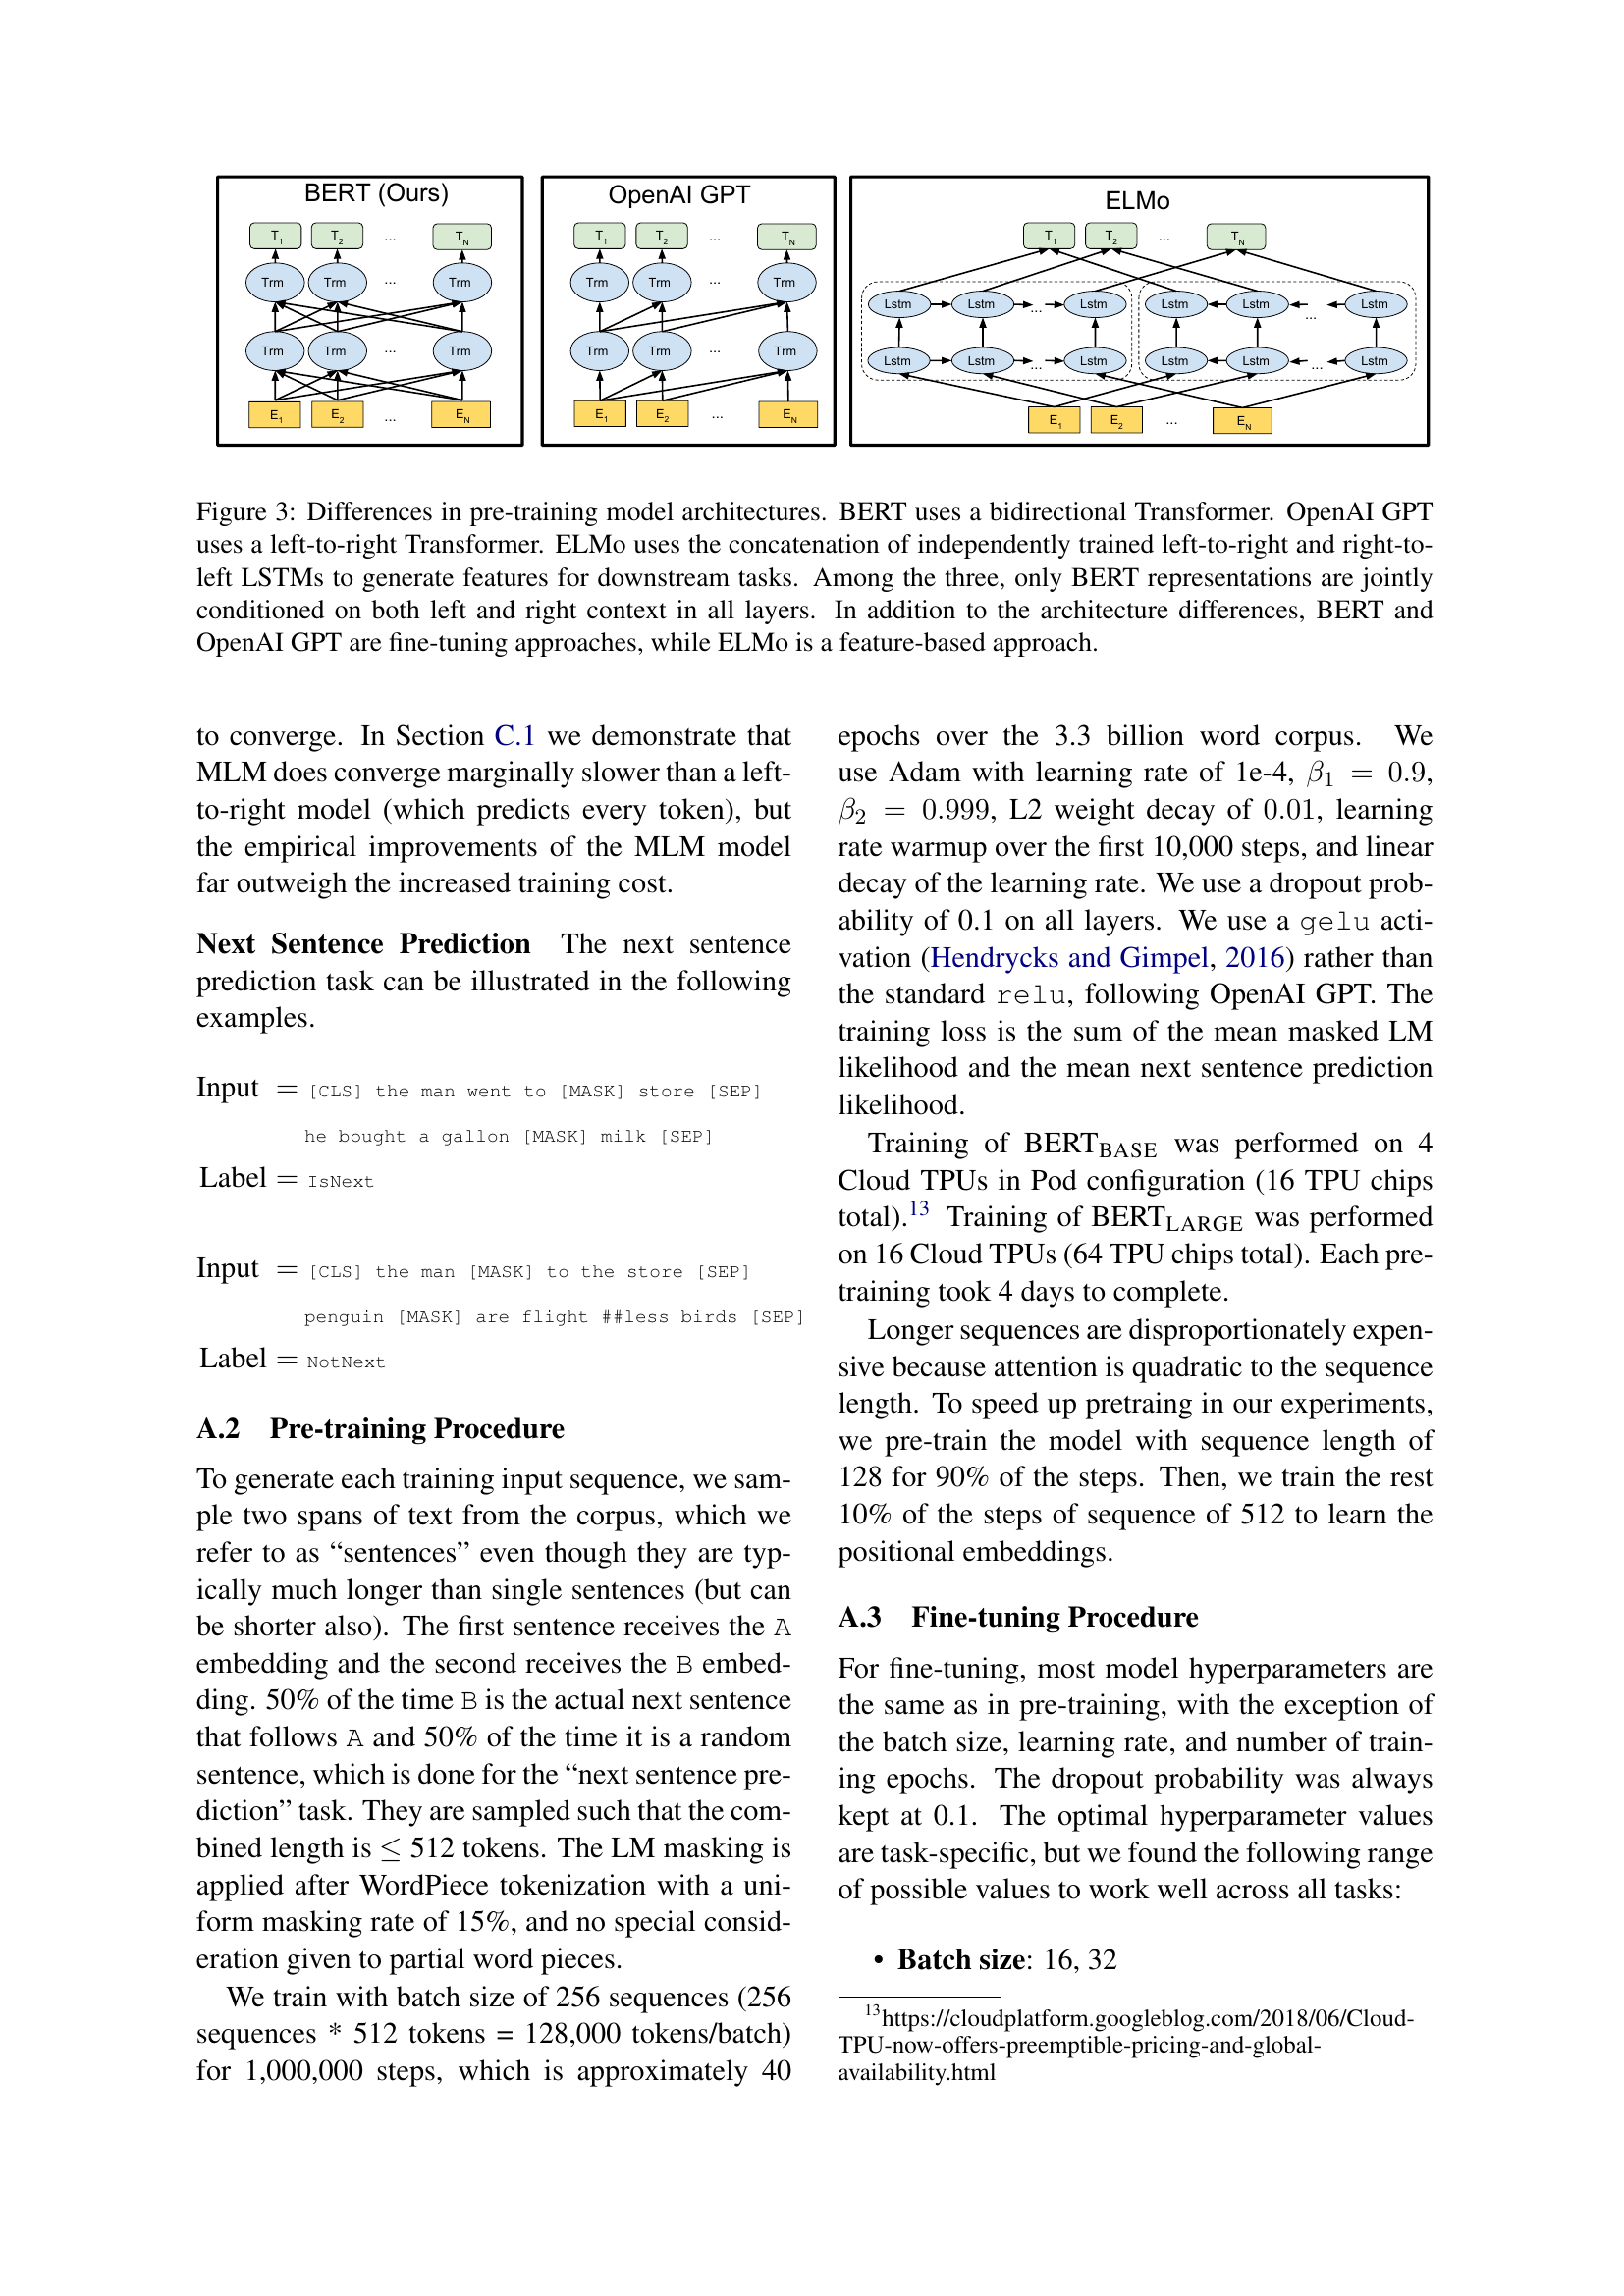
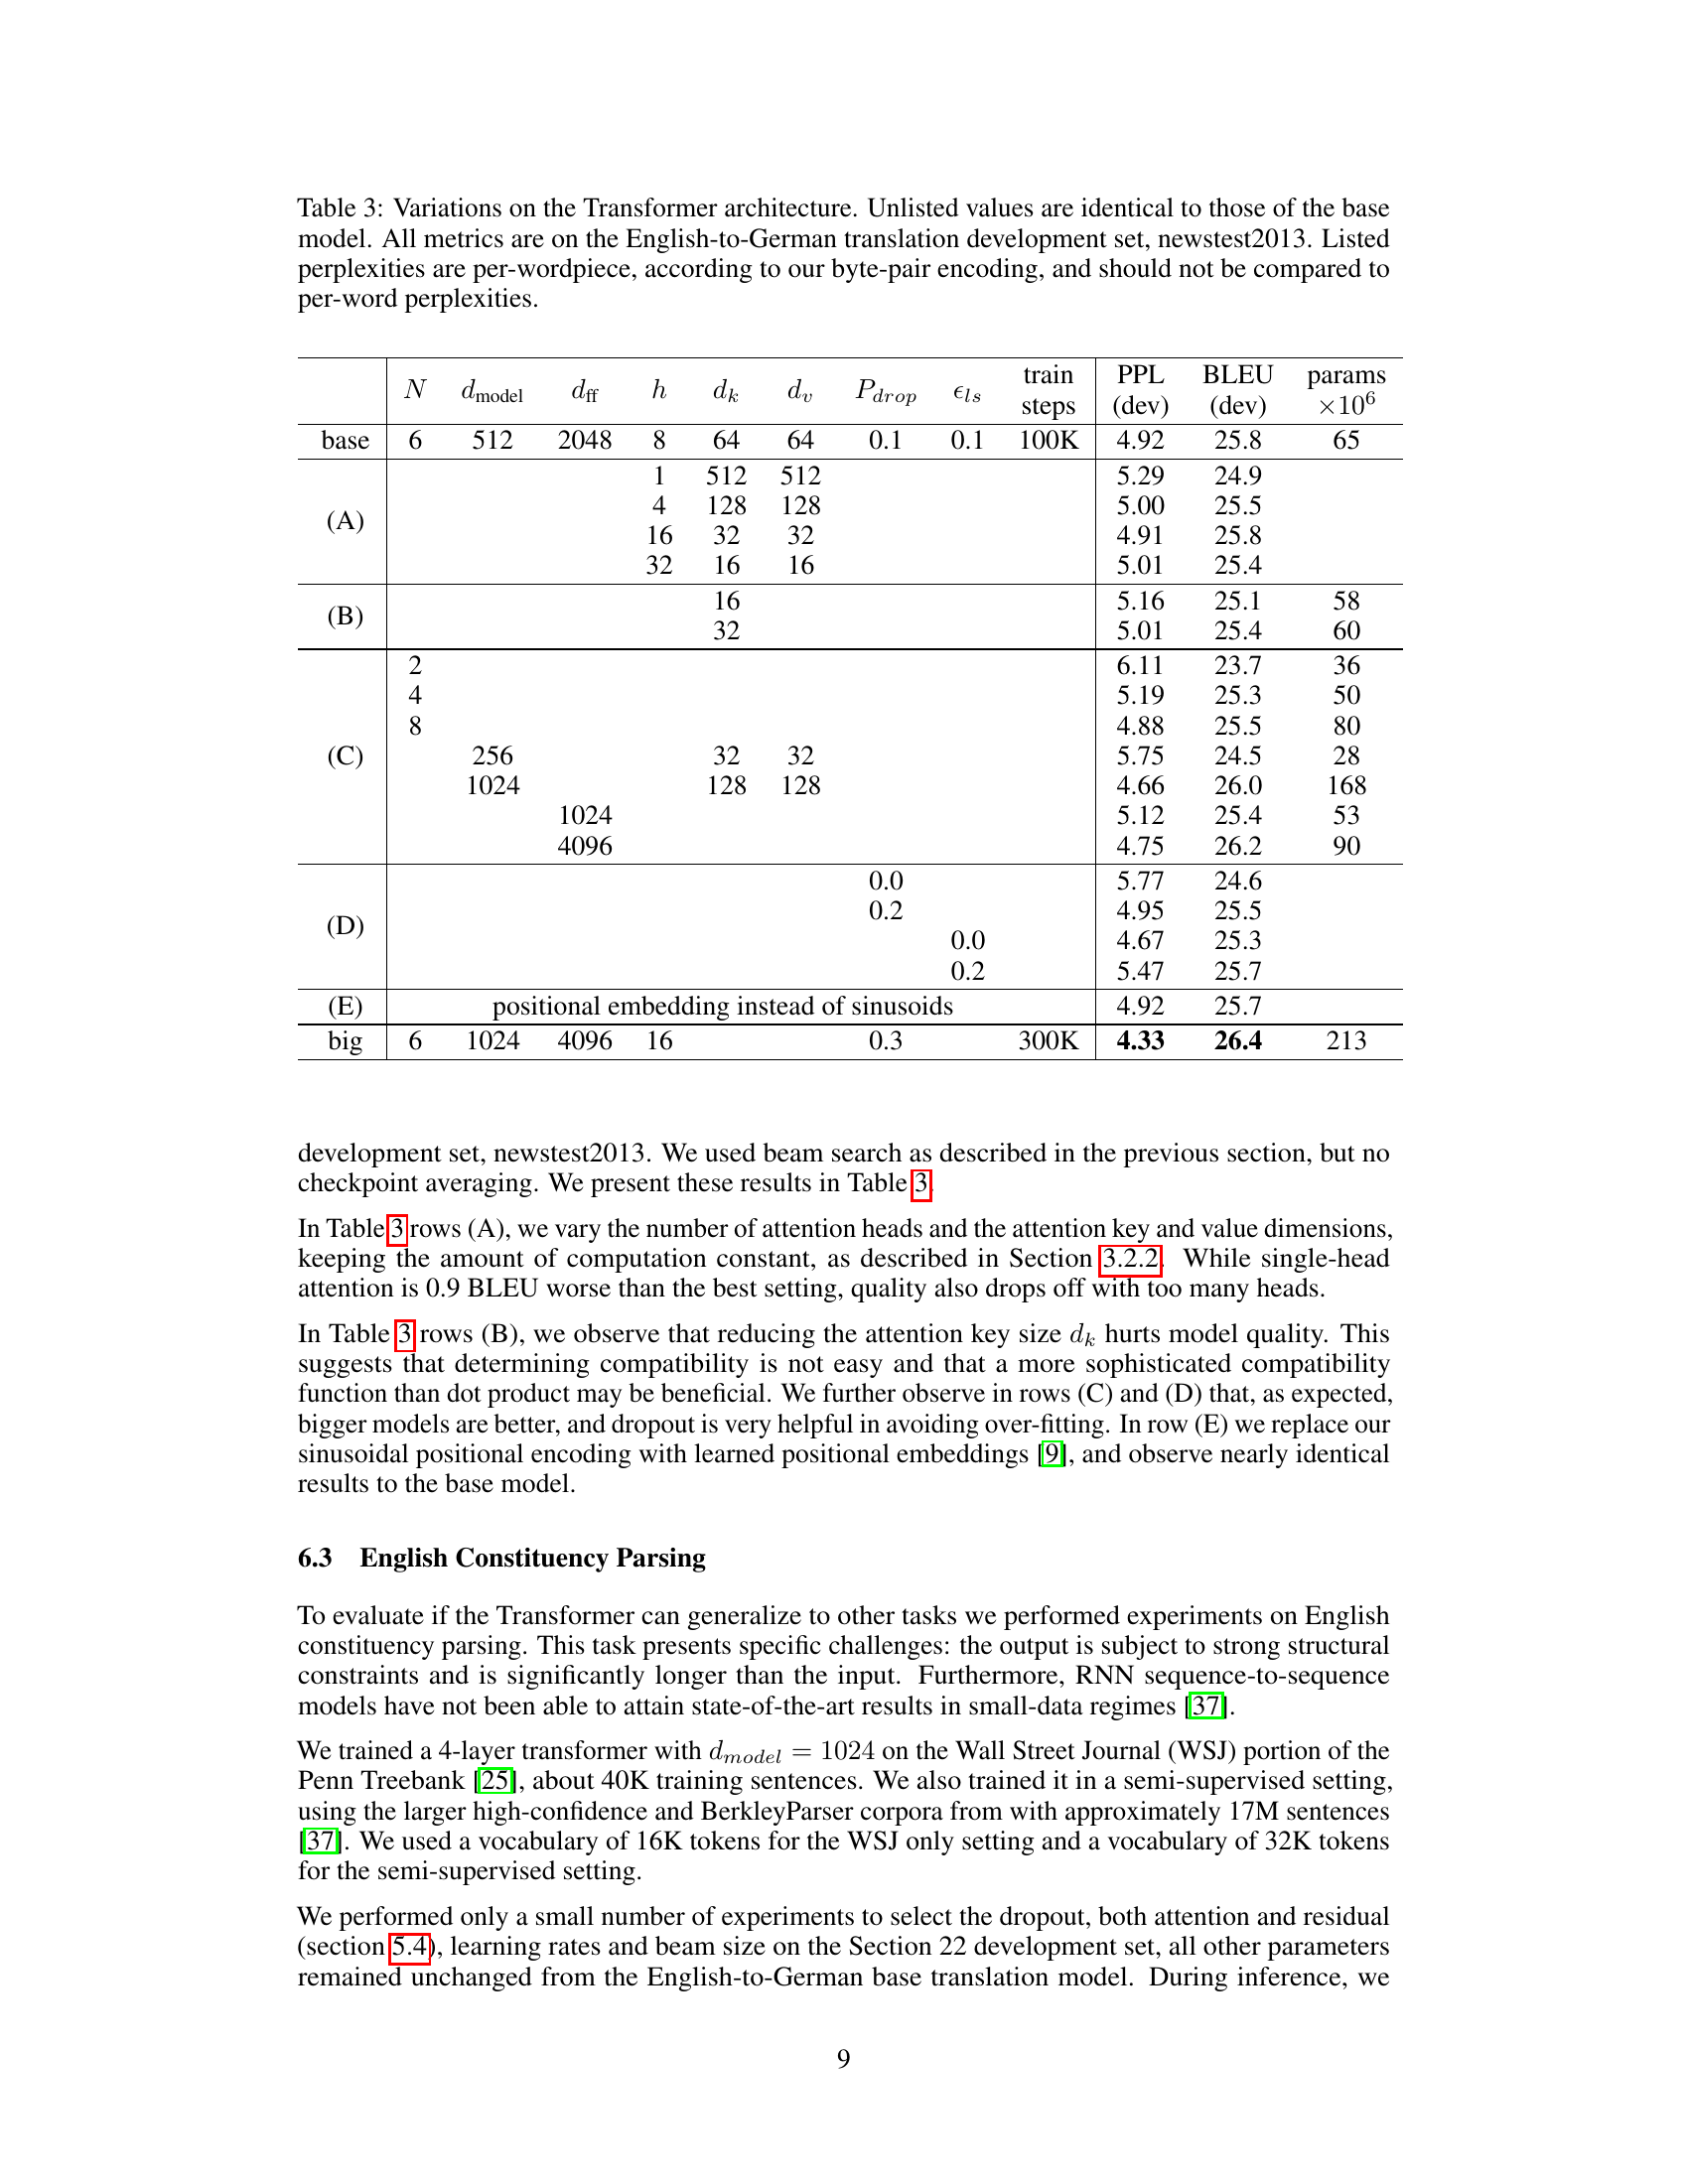

**Answer**

BERT Base consists of **12 transformer blocks**. This is mentioned in the excerpt where the architecture of BERT is discussed, specifically noted as \( L = 12 \), where \( L \) denotes the number of layers (or transformer blocks) in the BERT Base model. Each transformer block contributes to the model's ability to process input sequences through multiple layers of attention and feed-forward networks, which is integral to its performance on various NLP tasks.

----------------------------------------------------------------------------------------------------


In [26]:
# Define the query
query = "How many transformers blocks in BERT Base? Justify your answer."
# Retrieve the documents
print("Retrieving documents...")
retrieved_documents = search(query, index, documents, images, metadata, k=3)
print("Documents retrieved...")
# Generate
print("Generating the answer...")
answer = vlm(prompt=query, retrieved_documents=retrieved_documents)
print("Answer generated...")
print(100*'-')
display(Markdown("**Images**"))
display_images(retrieved_documents)
display(Markdown("**Answer**"))
display(Markdown(answer))
print(100*'-')

Note: at the time of testing, we noticed that Anthropic Claude Sonnet 3.5 (run on AWS) was faster. Maybe it is just by chance. We have not done enough testing to assess.

## Conclusion
In this article, we have explained the Retrieval-Augmented Generation (RAG) and showed the limitations of text-only RAG.
Then we have looked in detail at the "vision-RAG", where we have built an end-to-end example using ColPali for the retrieval and GPT-4o-mini for the generation.

We believe that the future will be "vision-RAG", and that this will unlock many new business use cases.

## References:

<sup>1</sup>: ColPali. Efficient Document Retrieval with Vision Language Models, Manuel Faysse et al, 2 July 2024.

<sup>2</sup>: https://huggingface.co/vidore/colpali

<sup>3</sup>: https://pyvespa.readthedocs.io/en/latest/examples/colpali-document-retrieval-vision-language-models.html